# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **religious events or traditions** (see below) for the region of **Ann Arbor, Michigan, United States**, or **United States** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Ann Arbor, Michigan, United States** to Ann Arbor, USA. In that case at least one source file must be about **Ann Arbor, Michigan, United States**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Ann Arbor, Michigan, United States** and **religious events or traditions**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **religious events or traditions**?  For this category you might consider calendar events, demographic data about religion in the region and neighboring regions, participation in religious events, or how religious events relate to political events, social movements, or historical events.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

# Solution
In the solution personal food expenditure in 2016 is compared to the number of religious (Catholic) holidays in the US. Target is to see if there is a correlation between number of holidays and food expenditure in the US in 2016.

## Datasets

### Personal consumption expenditure

U.S. Bureau of Economic Analysis, Personal consumption expenditures: [Food [DFXARC1M027SBEA]]( https://fred.stlouisfed.org/series/DFXARC1M027SBEA)

Filtered dataset for [2016 expenditure in CSV format](https://fred.stlouisfed.org/graph/fredgraph.csv?chart_type=line&recession_bars=on&log_scales=&bgcolor=%23e1e9f0&graph_bgcolor=%23ffffff&fo=Open+Sans&ts=12&tts=12&txtcolor=%23444444&show_legend=yes&show_axis_titles=yes&drp=0&cosd=2015-12-26&coed=2017-01-30&height=450&stacking=&range=Custom&mode=fred&id=DFXARC1M027SBEA&transformation=lin&nd=1959-01-01&ost=-99999&oet=99999&lsv=&lev=&mma=0&fml=a&fgst=lin&fgsnd=2009-06-01&fq=Monthly&fam=avg&vintage_date=&revision_date=&line_color=%234572a7&line_style=solid&lw=2&scale=left&mark_type=none&mw=2&width=1168)

### Catholic holidays

A List of Catholic Holidays in the [2016 Year](https://www.calendar-12.com/catholic_holidays/2016).

## Data preprocessing 

In [1]:
import pandas as pd
import numpy as np

In [2]:
data_url = "https://fred.stlouisfed.org/graph/fredgraph.csv?chart_type=line&recession_bars=on&log_scales=&bgcolor=%23e1e9f0&graph_bgcolor=%23ffffff&fo=Open+Sans&ts=12&tts=12&txtcolor=%23444444&show_legend=yes&show_axis_titles=yes&drp=0&cosd=2015-12-26&coed=2017-01-30&height=450&stacking=&range=Custom&mode=fred&id=DFXARC1M027SBEA&transformation=lin&nd=1959-01-01&ost=-99999&oet=99999&lsv=&lev=&mma=0&fml=a&fgst=lin&fgsnd=2009-06-01&fq=Monthly&fam=avg&vintage_date=&revision_date=&line_color=%234572a7&line_style=solid&lw=2&scale=left&mark_type=none&mw=2&width=1168"
df_expenditure = pd.read_csv(data_url)

In [3]:
df_expenditure.head()

,DATE,DFXARC1M027SBEA
0,2016-01-01,907.2
1,2016-02-01,907.3
2,2016-03-01,904.8
3,2016-04-01,914.6
4,2016-05-01,917.3


In [4]:
# Find string between two strings
def find_between( s, first, last ):
    try:
        start = s.index( first ) + len( first )
        end = s.index( last, start )
        return s[start:end]
    except ValueError:
        return ""

In [5]:
from urllib.request import urlopen

link = "http://www.calendar-12.com/catholic_holidays/2016"
response = urlopen(link)
content = response.read().decode("utf-8") 

In [6]:
# 'Poor mans' way of parsing days from HTML.
# Using this approach since learning environment does not
# have proper packages installed for html parsing.
table = find_between(content, "<tbody>","</tbody>");
rows = table.split("/tr")

csv = "Day\n"
for row in rows:
    day = find_between(row, '">', "</t")
    day = find_between(day, "> ", "</")
    csv = csv + day + "\n"

print(csv)

Day
Friday, January 1, 2016
Wednesday, January 6, 2016
Tuesday, February 9, 2016
Wednesday, February 10, 2016
Sunday, March 20, 2016
Thursday, March 24, 2016
Friday, March 25, 2016
Sunday, March 27, 2016
Monday, March 28, 2016
Thursday, May 5, 2016
Sunday, May 15, 2016
Thursday, May 26, 2016
Monday, August 15, 2016
Tuesday, November 1, 2016
Thursday, December 8, 2016
Sunday, December 25, 2016
Monday, December 26, 2016




In [7]:
import sys
if sys.version_info[0] < 3: 
    from StringIO import StringIO
else:
    from io import StringIO

    
df_catholic = pd.read_csv(StringIO(csv), sep=";")
df_catholic.head()

,Day
0,"Friday, January 1, 2016"
1,"Wednesday, January 6, 2016"
2,"Tuesday, February 9, 2016"
3,"Wednesday, February 10, 2016"
4,"Sunday, March 20, 2016"


In [125]:
from datetime import datetime

# Strip out weekday name
df_catholic["Date"] =  df_catholic.apply(lambda row:row["Day"][row["Day"].find(",")+1:], axis=1)
# Convert to date
df_catholic["Date"] =  df_catholic.apply(lambda row: datetime.strptime(row["Date"], " %B %d, %Y"), axis=1)
df_catholic["Holiday"] = 1
df_catholic.head()

,Day,Date,Holiday
0,"Friday, January 1, 2016",2016-01-01,1
1,"Wednesday, January 6, 2016",2016-01-06,1
2,"Tuesday, February 9, 2016",2016-02-09,1
3,"Wednesday, February 10, 2016",2016-02-10,1
4,"Sunday, March 20, 2016",2016-03-20,1


In [9]:
# Convert to expenditure also to date
df_expenditure["Date"] = df_expenditure.apply(lambda row: datetime.strptime(row["DATE"], "%Y-%m-%d"), axis=1)
df_expenditure.head()

,DATE,DFXARC1M027SBEA,Date
0,2016-01-01,907.2,2016-01-01
1,2016-02-01,907.3,2016-02-01
2,2016-03-01,904.8,2016-03-01
3,2016-04-01,914.6,2016-04-01
4,2016-05-01,917.3,2016-05-01


## Visualise correlation
Let's see how correlation looks when comparing number of Catholic holidays to montly spendin in the US.

Target for the visualisation is to show Catholic holidays for a month and project those on to the expenditure curve. This helps us to see if there is a direct correlation between expenditure and holidays or is there not.

In [10]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [124]:
%matplotlib notebook

<IPython.core.display.Javascript object>


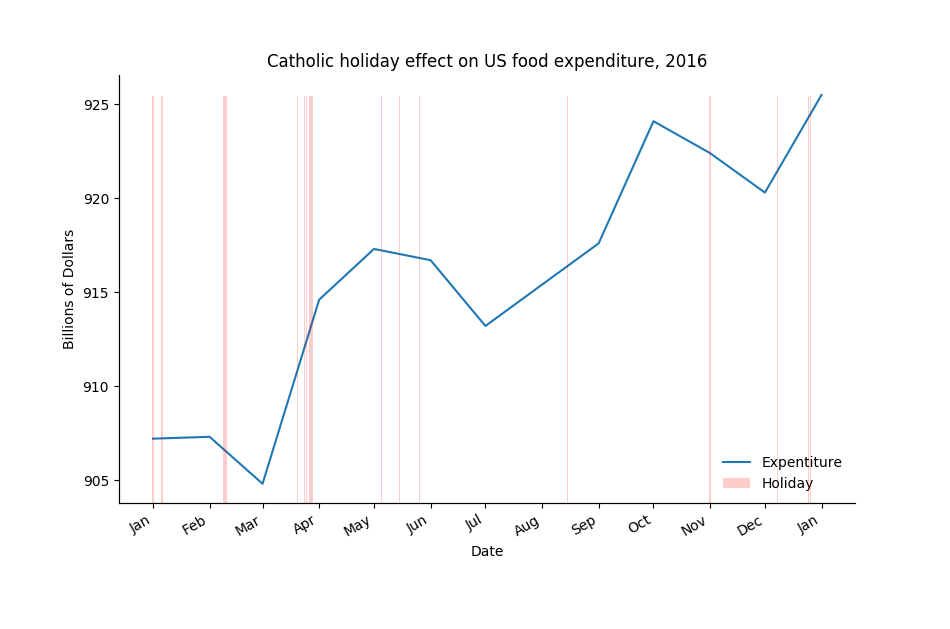

In [126]:

fig, ax = plt.subplots()
a = ax.plot(list(df_expenditure["Date"]), df_expenditure["DFXARC1M027SBEA"], label="Expentiture", zorder=10)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel("Date")
plt.ylabel("Billions of Dollars")
plt.title("Catholic holiday effect on US food expenditure, 2016")

ax2 = ax.twinx()
#b = ax2.scatter(list(df_catholic["Date"]),df_catholic["Holiday"], s=60, c="red", alpha=0.7, label="Holiday")

b = ax2.bar(list(df_catholic["Date"]),df_catholic["Holiday"], alpha=0.2, label="Holiday", color="Red")

ax2 = plt.gca()
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

#my_xticks = ['','','Holiday','', '']
#plt.yticks(list(df_catholic["Holiday"]), my_xticks)

ax2 = plt.gca()
ax2.yaxis.set_visible(False)

# Combine legend
h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax.legend(h1+h2, l1+l2, loc=4, frameon = False)

months = ['Jan','Feb','Mar','Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct' ,'Nov', 'Dec', 'Jan']
plt.xticks(list(df_expenditure["Date"]), months, rotation='vertical')
fig.autofmt_xdate()

plt.show()

## Conclusion
This visualisation aims to find an answer to a question about correlation between food expenditure in 2016 and Catholic holidays in the US in 2016. Two different web sites were scraped for informatio. For Catholic holidays [Calendar-12.com](https://www.calendar-12.com/catholic_holidays/2016) and for food expenditure in the US [FRED Economic Data](https://fred.stlouisfed.org/series/DFXARC1M027SBEA) was utilized. Calendar-12.com provided holiday information was scraped from a static html page and FRED information was downloaded in the form of filtered csv file. Food expenditure and holidays were plotted in a single graph where expenditure is shown as a line graph and holidays are projected on to this graph with thin bar charts.

Plot shows food expenditure change and holidays in a given month. From the graph it is clear to see that there is no correlation between amount of holidays and food expenditure change. However we can see that some months, April and December, seem to have sharp rise in food expenditure. This could be because of holidays, especially in December when Catholic Christmas and New Year are. But just based on data used in this paper we can't draw conclusions between food expenditure and Catholic holidays.